# Лабораторна робота №4 ІАД

<b>Тема:</b>   Бінарна класифікація на основі даних Titanic<br>
<b>Мета:</b> Закріпити знання, отримані під час лекції з класифікації, застосовуючи різні моделі машинного навчання для прогнозування виживання пасажирів на основі набору даних Titanic. Практичне завдання спрямоване на розвиток навичок роботи з реальними даними, підготовки даних, побудови моделей та їх оцінки.<br>
<b>Виконала:</b> студентка МІТ-31, Панченко Владислава

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

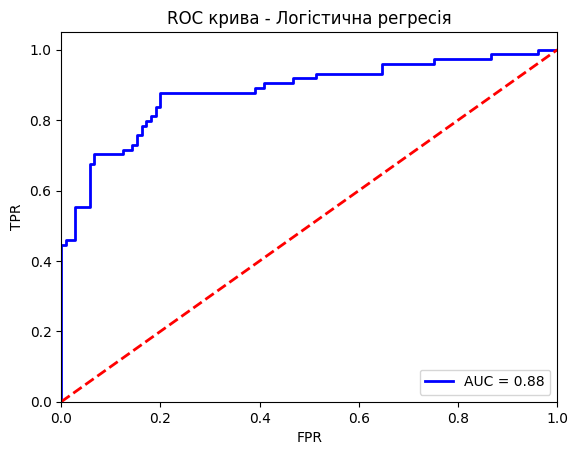

Логістична регресія - точність: 0.8044692737430168, precision: 0.7910447761194029, recall: 0.7162162162162162, F1-score: 0.75177304964539
Logistic Regression CV Scores: 0.7991337643587972
[[85 20]
 [19 55]]


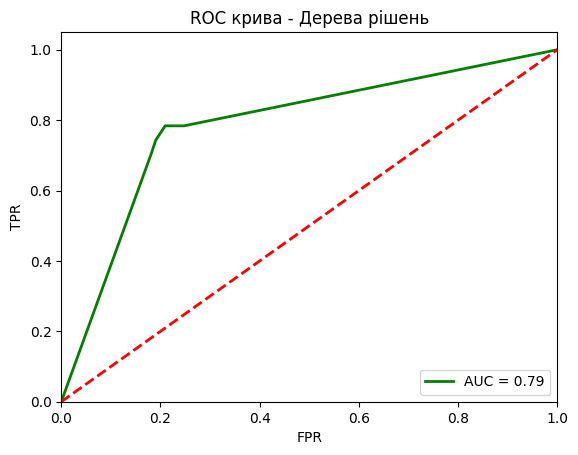

Дерева рішень - точність: 0.7821229050279329, precision: 0.7333333333333333, recall: 0.7432432432432432, F1-score: 0.738255033557047
Decision Tree CV Scores: 0.7755759211600026
Random Forest - Accuracy: 0.8268156424581006, Precision: 0.8115942028985508, Recall: 0.7567567567567568, F1-score: 0.7832167832167832
[[92 13]
 [18 56]]


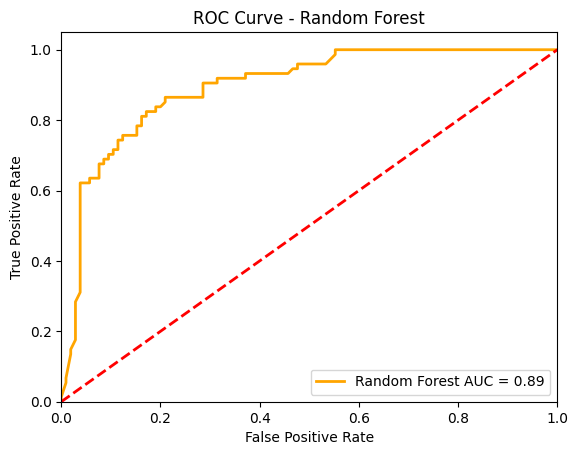

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.804469   0.791045  0.716216  0.751773
1        Decision Tree  0.782123   0.733333  0.743243  0.738255
2        Random Forest  0.826816   0.811594  0.756757  0.783217


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

titanic_data = sns.load_dataset('titanic')

#Ознайомлення з даними
#Виведіть перші 10 рядків набору даних
print(titanic_data.head(10))
#Отримайте базову статистику за допомогою методу describe() та дослідіть пропущені значення
print(titanic_data.describe())
print(titanic_data.isnull().sum())

#Попередня обробка даних
#Визначте та обробіть пропущені значення
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].mean())
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])
#Закодуйте категоріальні змінні
titanic_data = pd.get_dummies(titanic_data, columns=['sex', 'embarked'], drop_first=True)
#Створіть нові ознаки
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch']

#Поділ даних на тренувальну та тестову вибірки
X = titanic_data.drop(columns=['survived', 'deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'sibsp', 'parch'])
y = titanic_data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Побудова моделей
#Логістична регресія
#Тренування моделі
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
#Передбачення
y_pred_log = log_model.predict(X_test)
#Оцінка метрик
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
# Матриця плутанини
confusion_log = confusion_matrix(y_test, y_pred_log)
print(confusion_log)
# ROC-крива та AUC
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='AUC = %0.2f' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC крива - Логістична регресія')
plt.legend(loc='lower right')
plt.show()
print(f'Логістична регресія - точність: {accuracy_log}, precision: {precision_log}, recall: {recall_log}, F1-score: {f1_log}')
#Крос-валідація для логістичної регресії
log_cv_scores = cross_val_score(log_model, X, y, cv=5)
print(f'Logistic Regression CV Scores: {log_cv_scores.mean()}')

#Дерева рішень
#Тренування моделі
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
#Передбачення
y_pred_tree = tree_model.predict(X_test)
#Оцінка метрик
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
#Матриця плутанини
confusion_tree = confusion_matrix(y_test, y_pred_tree)
print(confusion_tree)
#ROC-крива та AUC
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test)[:, 1])
roc_auc_tree = auc(fpr_tree, tpr_tree)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='AUC = %0.2f' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC крива - Дерева рішень')
plt.legend(loc='lower right')
plt.show()
print(f'Дерева рішень - точність: {accuracy_tree}, precision: {precision_tree}, recall: {recall_tree}, F1-score: {f1_tree}')
# Крос-валідація для дерева рішень
tree_cv_scores = cross_val_score(tree_model, X, y, cv=5)
print(f'Decision Tree CV Scores: {tree_cv_scores.mean()}')

#Випадкові ліси (Random Forest)
#Тренування моделі
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
#Передбачення
y_pred_rf = rf_model.predict(X_test)
#Оцінка метрик
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f'Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}')
#Матриця плутанини
confusion_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_rf)
# ROC-крива та AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, color='orange', lw=2, label='Random Forest AUC = %0.2f' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()
#Гіперпараметри для випадкового лісу
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f'Best parameters for Random Forest: {grid_search.best_params_}')

#Порівняння
models_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_log, accuracy_tree, accuracy_rf],
    'Precision': [precision_log, precision_tree, precision_rf],
    'Recall': [recall_log, recall_tree, recall_rf],
    'F1 Score': [f1_log, f1_tree, f1_rf]
})
print(models_metrics)